In [1]:
import os
import os.path as osp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def convert_to_melt_df(algo, task, type):
    # load csv to dataframe
    path = f"/home/returaj/Documents/research/offline_safe_rl/weighted_bc/{algo}/{task}/{type}"
    abs_filenames = sorted([osp.join(path, f) for f in os.listdir(path)])
    dfs = []
    for i, f in enumerate(abs_filenames):
        d = pd.read_csv(f)
        if "Wall time" not in d.columns:
            continue 
        d = d.drop(columns=["Wall time"]).rename(columns={"Value": f"seed_{i}", "Step": "episode"})
        dfs.append(d)
 
    # join dataframes based on episode
    df = dfs[0]
    for d in dfs[1:]:
        df = df.join(d.set_index("episode"), on="episode")
    
    df = pd.melt(df, id_vars=["episode"], var_name="algo_name", value_name=type)
    df["algo_name"] = "positive_bc" if algo == "positive_bc" else "weighted_bc"
    return df

In [3]:
task = "Ant_Velocity"
type = "ep_cost"

positive_bc_df = convert_to_melt_df("positive_bc", task, type)
weighted_bc_df = convert_to_melt_df("positive", task, type)

In [4]:
d = pd.concat([positive_bc_df, weighted_bc_df], ignore_index=True, sort=False)

Text(0.5, 1.0, 'Ant_Velocity')

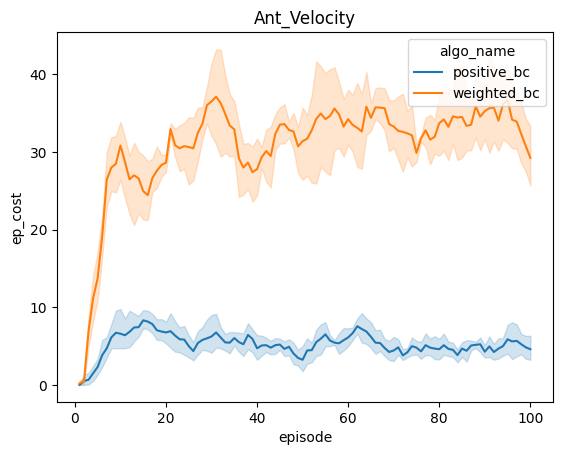

In [5]:
fig, ax = plt.subplots()

sns.lineplot(ax=ax, data=d, x="episode", y=type, hue="algo_name")
sns.move_legend(ax, "upper right")
ax.set_title(task)

In [43]:
save_fig_path = f"/home/returaj/Documents/research/offline_safe_rl/weighted_bc/{task}_{type}.svg"
fig.savefig(save_fig_path, format="svg")